In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kardam/nltk_data...


In [2]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    return text.strip()


In [3]:
reviews = [
    "Kwatra Legal LLP is the best Trademark registration firm I’ve come across.",
    "They delayed my Trademark objection and I had to follow up repeatedly.",
    "Their FSSAI service was great, but the Trademark process was confusing.",
    "Super professional and helpful IPR team!",
    "Disappointed by how long it took to receive updates.",
]

df = pd.DataFrame(reviews, columns=["Original_Review"])
df["Cleaned_Review"] = df["Original_Review"].apply(clean_text)
df.head()


,Original_Review,Cleaned_Review
0,Kwatra Legal LLP is the best Trademark registr...,kwatra legal llp is the best trademark registr...
1,They delayed my Trademark objection and I had ...,they delayed my trademark objection and i had ...
2,"Their FSSAI service was great, but the Tradema...",their fssai service was great but the trademar...
3,Super professional and helpful IPR team!,super professional and helpful ipr team
4,Disappointed by how long it took to receive up...,disappointed by how long it took to receive up...


In [4]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    # TextBlob Scores
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # VADER Scores
    vader_scores = sia.polarity_scores(text)
    vader_compound = vader_scores['compound']

    # Sentiment Label Logic (TextBlob)
    if polarity > 0.1:
        sentiment = "Positive"
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return pd.Series([polarity, subjectivity, vader_compound, sentiment])

df[["Polarity", "Subjectivity", "VADER_Compound", "Sentiment"]] = df["Cleaned_Review"].apply(analyze_sentiment)
df


,Original_Review,Cleaned_Review,Polarity,Subjectivity,VADER_Compound,Sentiment
0,Kwatra Legal LLP is the best Trademark registr...,kwatra legal llp is the best trademark registr...,0.333333,0.300000,0.6908,Positive
1,They delayed my Trademark objection and I had ...,they delayed my trademark objection and i had ...,0.000000,0.000000,-0.2263,Neutral
2,"Their FSSAI service was great, but the Tradema...",their fssai service was great but the trademar...,0.250000,0.575000,0.0516,Positive
3,Super professional and helpful IPR team!,super professional and helpful ipr team,0.216667,0.383333,0.7717,Positive
4,Disappointed by how long it took to receive up...,disappointed by how long it took to receive up...,-0.400000,0.575000,-0.4767,Negative


In [7]:
# Define a simple confidence metric based on absolute polarity and compound score
def compute_confidence(row):
    return round((abs(row['Polarity']) + abs(row['VADER_Compound'])) / 2, 2)

df["Confidence_Score"] = df.apply(compute_confidence, axis=1)
df


,Original_Review,Cleaned_Review,Polarity,Subjectivity,VADER_Compound,Sentiment,Confidence_Score
0,Kwatra Legal LLP is the best Trademark registr...,kwatra legal llp is the best trademark registr...,0.333333,0.300000,0.6908,Positive,0.51
1,They delayed my Trademark objection and I had ...,they delayed my trademark objection and i had ...,0.000000,0.000000,-0.2263,Neutral,0.11
2,"Their FSSAI service was great, but the Tradema...",their fssai service was great but the trademar...,0.250000,0.575000,0.0516,Positive,0.15
3,Super professional and helpful IPR team!,super professional and helpful ipr team,0.216667,0.383333,0.7717,Positive,0.49
4,Disappointed by how long it took to receive up...,disappointed by how long it took to receive up...,-0.400000,0.575000,-0.4767,Negative,0.44


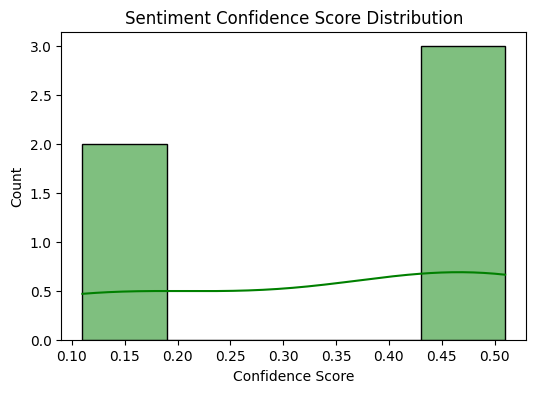

In [8]:
# Confidence Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Confidence_Score"], bins=5, kde=True, color='green')
plt.title("Sentiment Confidence Score Distribution")
plt.xlabel("Confidence Score")
plt.show()


/var/folders/3k/lxgtmhmx4wx5k1lvynmj796r0000gn/T/ipykernel_13698/2366988761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="Set2")


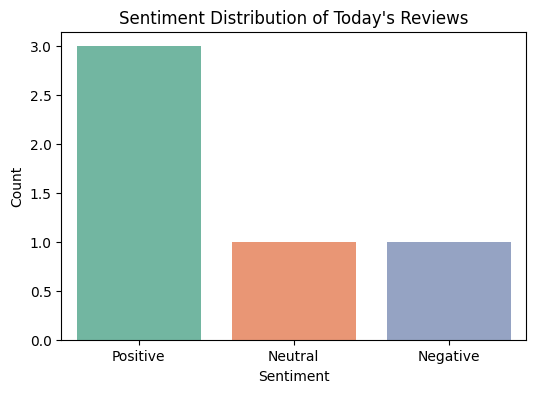

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment", palette="Set2")
plt.title("Sentiment Distribution of Today's Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [6]:
df.to_csv("Client_Review_Sentiment_Report.csv", index=False)
print("✅ Exported: Client_Review_Sentiment_Report.csv")


✅ Exported: Client_Review_Sentiment_Report.csv
